# Evaluation Metrics
Note that I use different notation from textbooks because I find it easier to read:
* $ Predicted_i $ instead of $ \hat{y_i} $ for predicted value of the target for instance $i$
* $ Actual_i $ instead of $ y_i $ actual value of the target for instance $i$

## Regression
* **Mean Squared Error (MSE)**: Useful when large errors are particularly undesirable. Larger errors have a disproportionately larger impact on the metric. 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Actual_i - Predicted_i)^2
$$

* **Root Mean Squared Error (RMSE)**: Provids an error in the same units as the original data. Like MSE, it is sensitive to outliers.
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Actual_i - Predicted_i)^2}
$$

* **Root Mean Squared Logarithmic Error (RMSLE)**:
$$
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} ( \log(1+Predicted_i) - \log(1+Actual_i))^2}
$$

* **Mean Absolute Error (MAE)**: More robust to outliers compared to MSE and RMSE.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Actual_i - Predicted_i|
$$

### Percentage Error 

* **Mean Absolute Percentage Error (MAPE)**: Used when you want a measure that is independent of the scale of your data. It expresses the error as a percentage of the actual values, making it easier to interpret and compare across different datasets or models, regardless of their units or scales.
  * The output can be arbitrarily high when y_true is small or when abs(y_true - y_pred) is large (which is common for most regression metrics).

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{Actual_i - Predicted_i}{Actual_i} \right| \times 100\%
$$


* **Modified MAPE (MMAPE) or Adjusted MAPE**: To address the issue of small actual values, a modified version of MAPE can be used where a small constant is added to the denominator to avoid extremely high percentage errors.

$$
\text{MMAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{Actual_i - Predicted_i}{Actual_i + \epsilon} \right| \times 100\%
$$

* **Symmetric MAPE (SMAPE)**: This is an alternative to MAPE that equally penalizes overforecast and underforecast by modifying the denominator to be the average of the predicted and actual values, thus avoiding the issue when actual values are near zero.

$$
\text{SMAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \frac{|Actual_i - Predicted_i|}{(|Actual_i| + |Predicted_i|) / 2}
$$

* **Weighted Average Percentage Error (WAPE)**: Errors are weighted by volume. Recommended over MAPE when the target can be low or has intermittent values. The problem of infinite error is removed since the summation of actual value in the denominator can never be zero.
$$
\text{WAPE} = \frac{\sum_{i=1}^{n} |Actual_i - Predicted_i|}{\sum_{i=1}^{n} |Actual_i|} \times 100\%
$$

* **Weighted MAPE (WMAPE)**: Used in cases where we want errors to be weighted by a priority, weight $w$ at time $t$ $(w_t)$. For example, we could weight by day of week as assign a weight of 10 on Monday and 1 on the remaining days.
$$
\text{WMAPE} = \frac{\sum_{i=1}^{n} w_t|Actual_i - Predicted_i|}{\sum_{i=1}^{n} w_t|Actual_i|} \times 100\%
$$

In [9]:
import numpy as np
import pandas as pd

def calculate_metrics(actual, predicted, rounding=2):
    mse = round(((actual - predicted) ** 2).mean(), rounding)  # Mean Squared Error
    rmse = round(np.sqrt(mse), rounding)  # Root Mean Squared Error
    mae = round(abs(actual - predicted).mean(), rounding)  # Mean Absolute Error
    mape = round((np.abs(actual - predicted) / actual).replace([np.inf, -np.inf], np.nan).mean() * 100, rounding)  # Mean Absolute Percentage Error
    modified_mape = round((np.abs(actual - predicted) / (actual + 1)).mean() * 100, rounding)  # Modified Mean Absolute Percentage Error
    smape = round((2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))).mean() * 100, rounding)  # Symmetric Mean Absolute Percentage Error
    wape = round(np.sum(np.abs(actual - predicted)) / np.sum(actual) * 100, rounding)  # Weighted Absolute Percentage Error
    wmape = round(np.sum((np.abs(actual - predicted) / actual) * actual) / np.sum(actual) * 100, rounding)  # Weighted Mean Absolute Percentage Error
    return mse, rmse, mae, mape, modified_mape, smape, wape, wmape


df = pd.DataFrame({    
    'actual': [0, 100, 200, 300, 400, 500],
    'model_1': [1, 110, 210, 320, 380, 480],
    'model_2': [2, 105, 195, 310, 390, 490],
    'model_3': [0, 120, 205, 290, 400, 510]
})
df['model_1_abs_diff'] = abs(df['actual'] - df['model_1'])
df['model_2_abs_diff'] = abs(df['actual'] - df['model_2'])
df['model_3_abs_diff'] = abs(df['actual'] - df['model_3'])
display(df)

# Calculate metrics for each model
metrics = []
for model in ['model_1', 'model_2', 'model_3']:
    mse, rmse, mae, mape, modified_mape, smape, wape, wmape = calculate_metrics(df['actual'], df[model], 2)
    metrics.append({
        'model': model,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Modified MAPE': modified_mape,
        'SMAPE': smape,
        'WAPE': wape,
        'WMAPE': wmape
    })

pd.DataFrame(metrics)

,actual,model_1,model_2,model_3,model_1_abs_diff,model_2_abs_diff,model_3_abs_diff
0,0,1,2,0,1,2,0
1,100,110,105,120,10,5,20
2,200,210,195,205,10,5,5
3,300,320,310,290,20,10,10
4,400,380,390,400,20,10,0
5,500,480,490,510,20,10,10


,model,MSE,RMSE,MAE,MAPE,Modified MAPE,SMAPE,WAPE,WMAPE
0,model_1,233.50,15.28,13.5,6.13,21.75,38.34,5.4,5.33
1,model_2,59.00,7.68,7.0,3.07,35.88,35.87,2.8,2.67
2,model_3,104.17,10.21,7.5,5.57,4.60,5.20,3.0,3.00


## Classification metrics


* **Accuracy**: The proportion of correct predictions among the all predictions.
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

* **Precision**: Of all the instances that the classifier labeled as positive, how many are actually positive.
$$ \text{Precision} = \frac{TP}{TP + FP} $$

* **Sensitivity / Recall / True Positive Rate**: Of all the actual positives, what proportion were correctly identified as positive.
$$ \text{Sensitivity} = \text{Recall} = \frac{TP}{TP + FN} $$

* **Specificity / True Negative Rate**: Of all the actual negatives, how many were correctly identified as negative.
$$ \text{Specificity} = \frac{TN}{TN + FP} $$

* **F1 Score**: Harmonic mean of precision and recall
$$ \text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

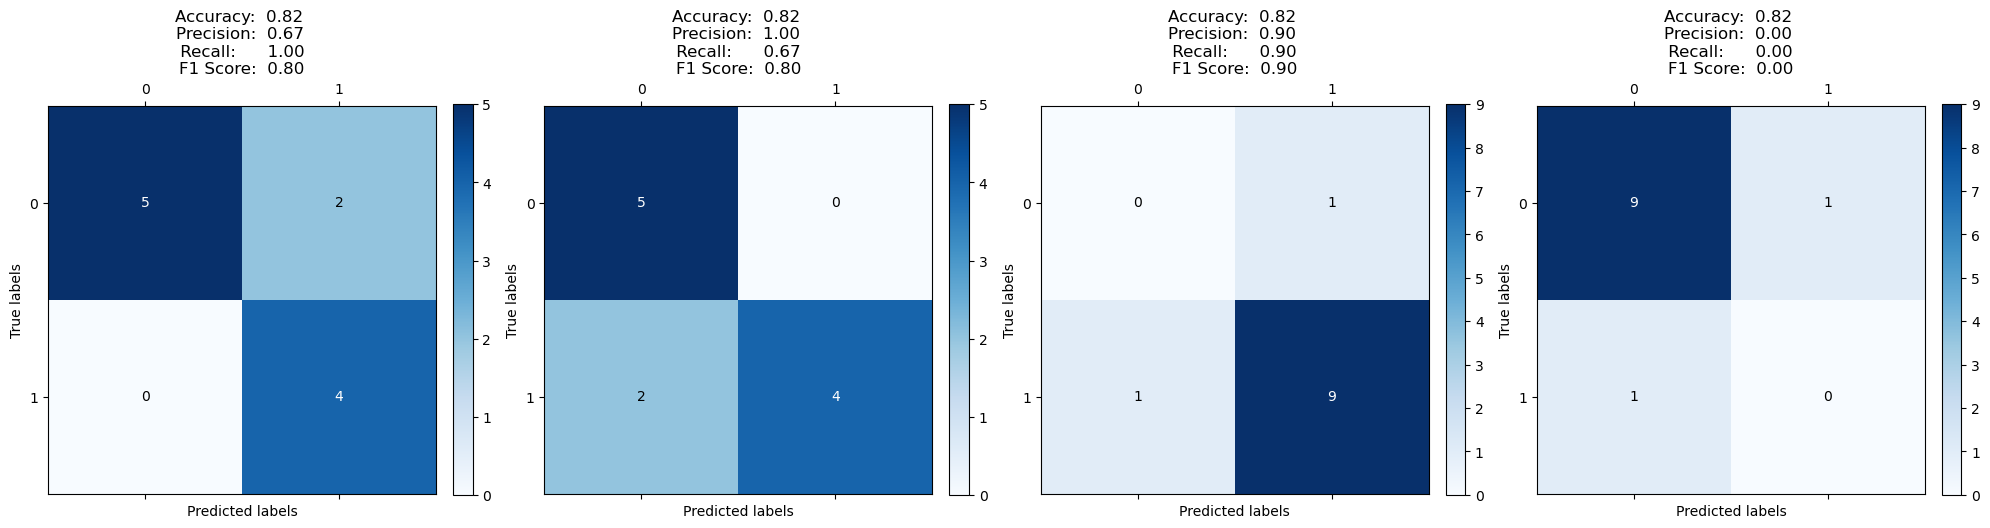

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def eval_classification_perf(y_true_list, y_pred_list):
    num_plots = len(y_true_list)
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()
    
    for i, (y_true, y_pred) in enumerate(zip(y_true_list, y_pred_list)):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Plot confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        cax = axes[i].matshow(cm, cmap='Blues')
        fig.colorbar(cax, ax=axes[i], fraction=0.046, pad=0.04)
        axes[i].set_xticks([0, 1])
        axes[i].set_yticks([0, 1])
        axes[i].set_xticklabels([0, 1])
        axes[i].set_yticklabels([0, 1])

        # Choose text color based on the background
        threshold = cm.max() / 2.
        for row in range(cm.shape[0]):
            for col in range(cm.shape[1]):
                color = "white" if cm[row, col] > threshold else "black"
                axes[i].text(col, row, format(cm[row, col], 'd'), 
                             ha="center", va="center",
                             color=color)

        axes[i].set_xlabel('Predicted labels')
        axes[i].set_ylabel('True labels')
        axes[i].set_title(f'Accuracy:  {accuracy:.2f} \nPrecision:  {precision:.2f} \n Recall:      {recall:.2f} \nF1 Score:  {f1:.2f}')
        # axes[i].set_title(f'Acc: {accuracy:.2f} Prec: {precision:.2f} Rec: {recall:.2f} F1: {f1:.2f}')

    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

y_true_list = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

y_pred_list = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
]

eval_classification_perf(y_true_list, y_pred_list)


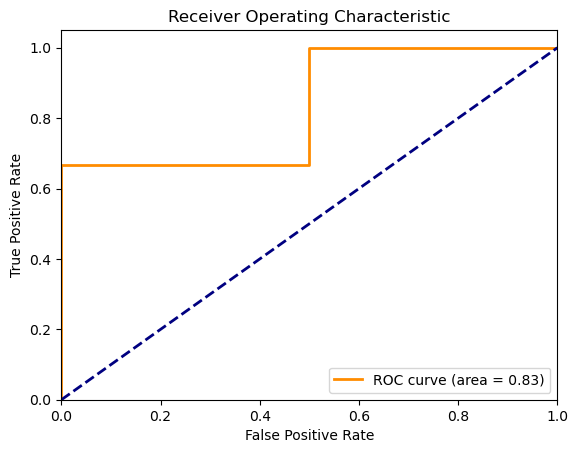

In [59]:
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, class_sep=.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the classifier
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


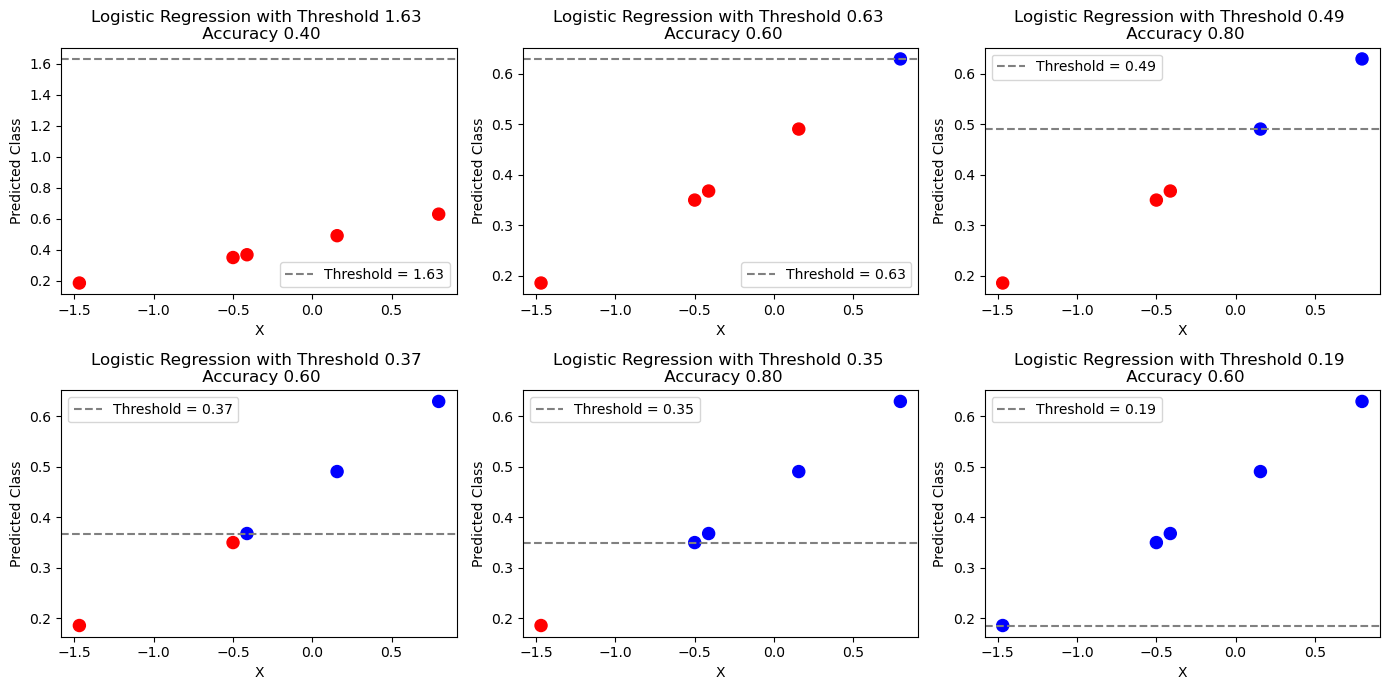

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7)) 
axes = axes.flatten()

for ax, threshold in zip(axes, thresholds):

    # Plot the threshold line
    ax.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold = {threshold:.2f}')
    
    # Scatter plot with predictions
    predictions = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
    probabilities = clf.predict_proba(X_test)[:, 1]
    colors = ['red' if value < threshold else 'blue' for value in probabilities]
    # colors = ['red' if value == 0 else 'blue' for value in predictions]
    ax.scatter(X_test, probabilities, marker='.', c=colors, s=300)
    # ax.grid(True)
    ax.set_xlabel('X')
    ax.set_ylabel('Predicted Class')
    ax.set_title(f'Logistic Regression with Threshold {threshold:.2f} \n Accuracy {accuracy_score(y_test, predictions):.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


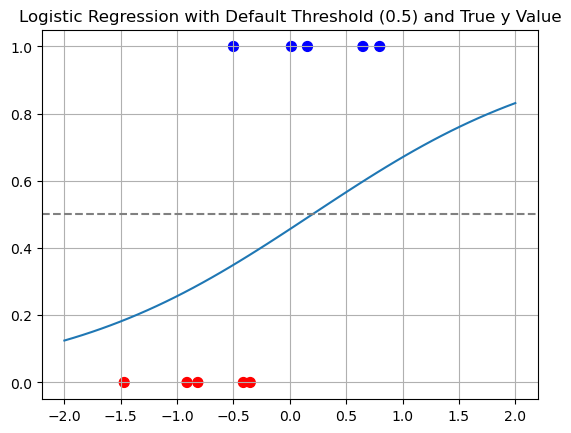

In [65]:
def f(x):
    return 1 / (1 + np.exp(-(clf.coef_ * x + clf.intercept_)))

line = np.linspace(-2, 2).reshape((-1,1))
# line = np.linspace(min(X), max(X)).reshape((-1,1))
plt.plot(line, f(line))
plt.axhline(y=0.5, color='gray', linestyle='--')
colors = ['red' if value == 0 else 'blue' for value in y]
plt.scatter(X, y, marker='.', c=colors, s=200)
plt.grid(True)
plt.title(f'Logistic Regression with Default Threshold (0.5) and True y Value')
plt.show()

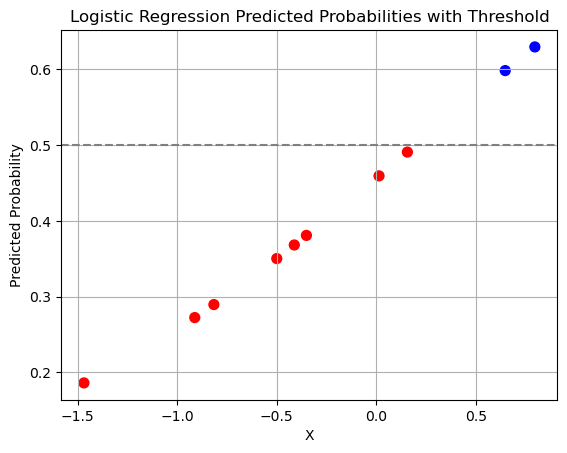

In [303]:
# This will give you the probabilities of the positive class
probabilities = clf.predict_proba(X)[:, 1]

colors = ['red' if value < 0.5 else 'blue' for value in probabilities]
plt.scatter(X, probabilities, marker='.', c=colors, s=200)

# Add a horizontal line at y=0.5 to represent the threshold
plt.axhline(y=0.5, color='gray', linestyle='--')

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Predicted Probabilities with Threshold')
plt.show()
